In [1]:
from __future__ import print_function
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from pandas import DataFrame
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import math
import seaborn as sns
from sklearn import datasets
import random
from collections import Counter

In [2]:
군집 = pd.read_excel('./0818 군집분석용_2019년 동별 자료.xlsx', 
              sheet_name = 'data')

In [3]:
군집.set_index('행정동', inplace=True)

In [4]:
target = 군집.columns
pd.set_option('display.max_columns', None)


# 군집분석에서 이정도면 정확하다고 할 만한 socre 기준치 값, 미리 임의로 정해놓기(여기서는 일단 500으로 설정)
temp_std_week = -300
temp_std_strong = -50


# 몇번 돌려볼 것인가(일단 30으로 가정)
반복 = 200

# 반드시 모여있어야 하는 친구들 1번째, 일단 임의로 3개 설정
must_have_1 = ['성내1동','성내2동','범어1동']

# 혹시 더 있으면
must_have_2 = []
must_have_3 = []

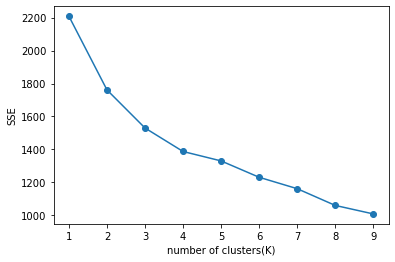

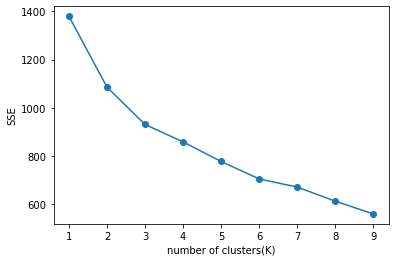

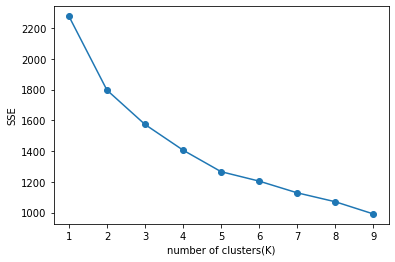

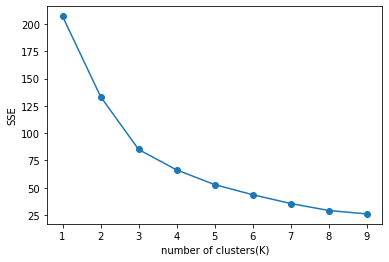

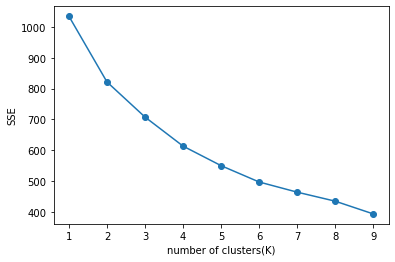

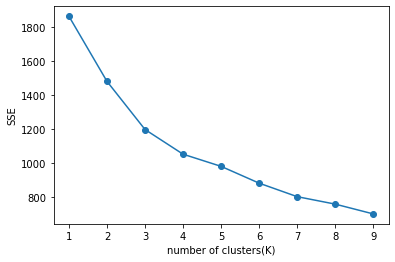

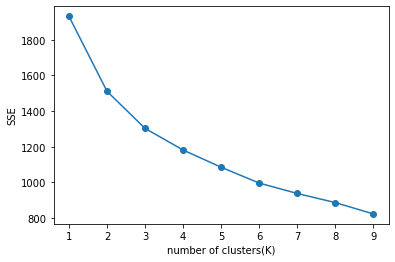

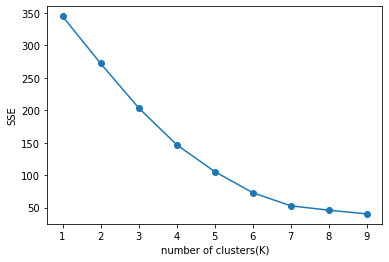

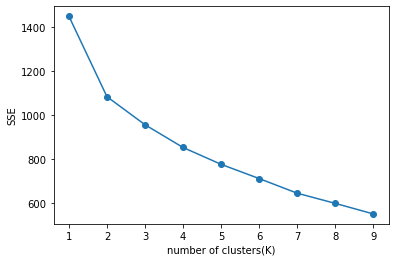

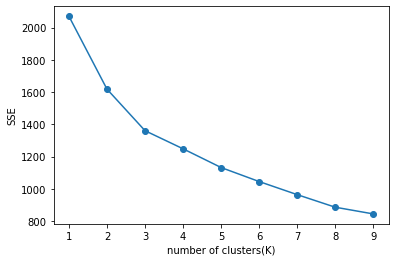

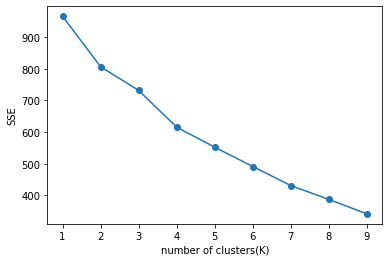

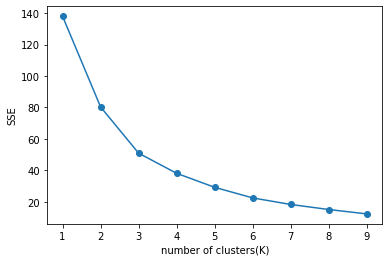

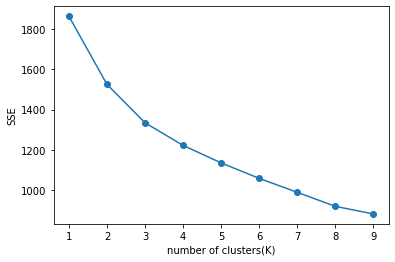

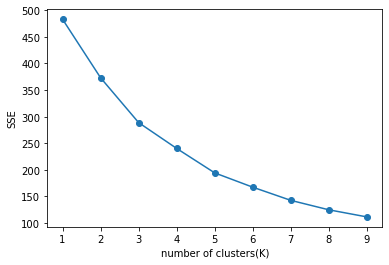

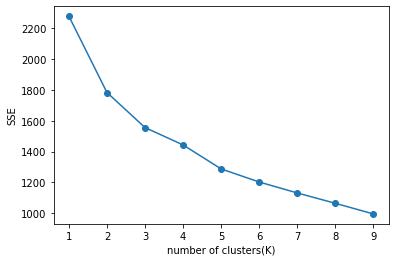

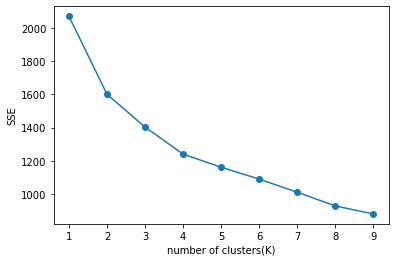

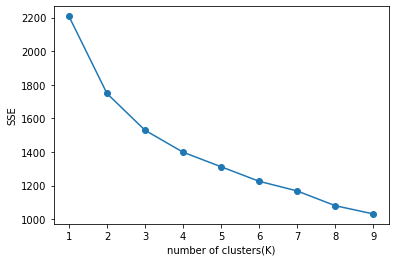

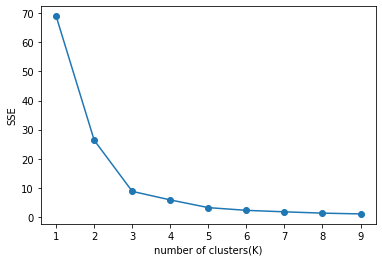

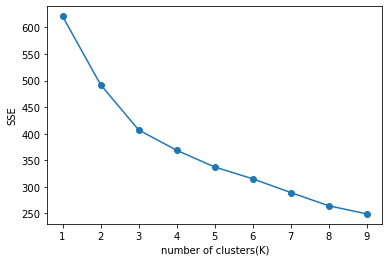

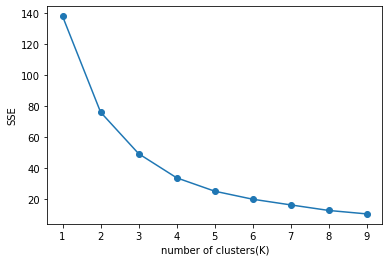

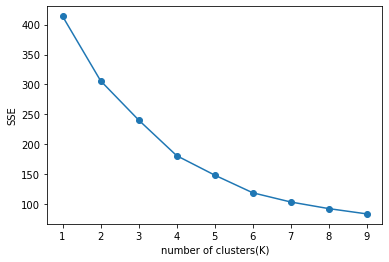

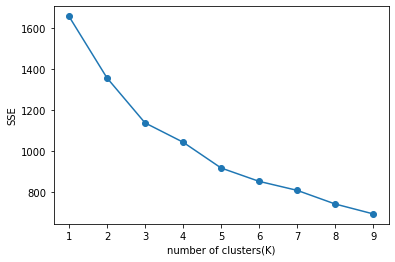

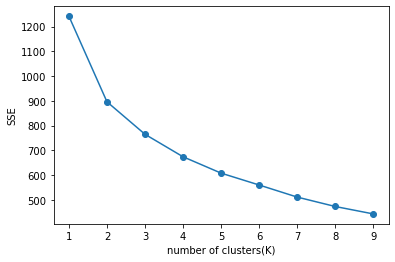

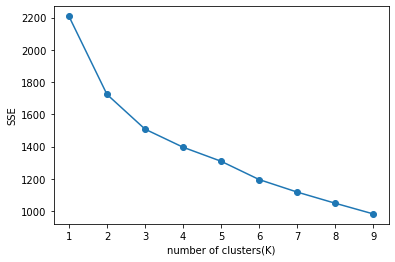

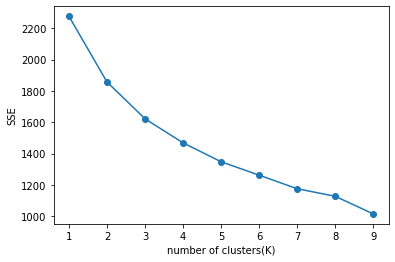

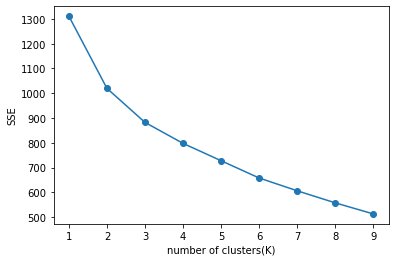

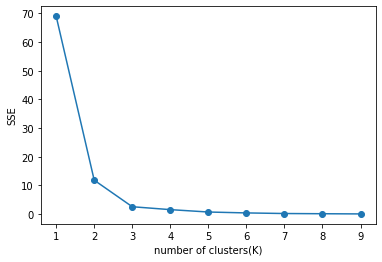

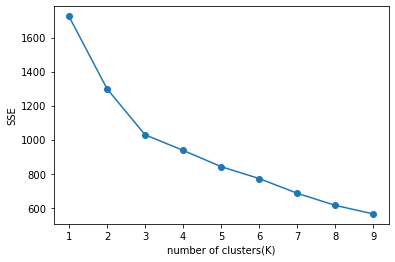

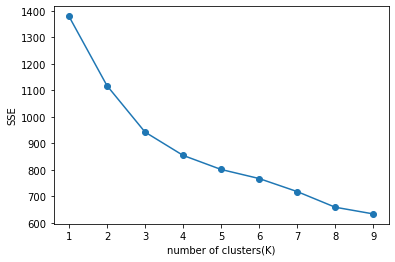

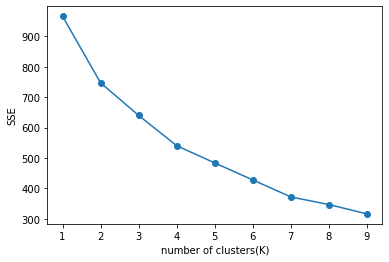

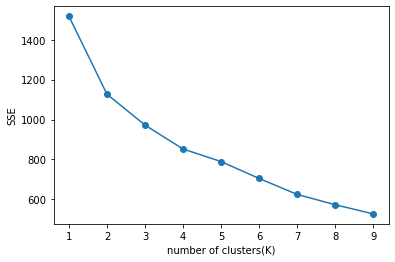

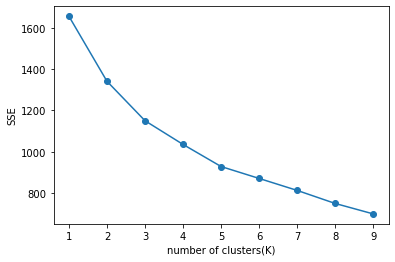

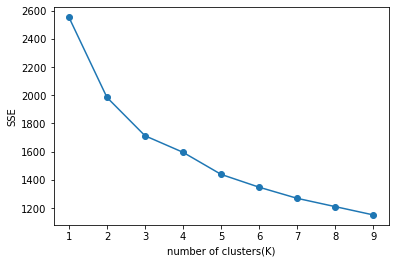

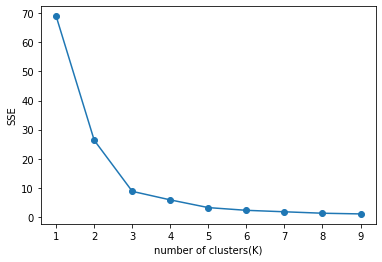

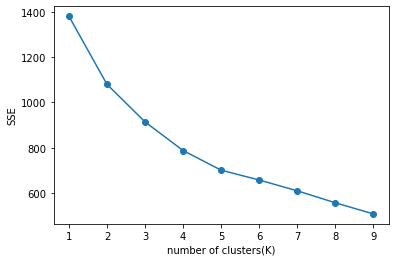

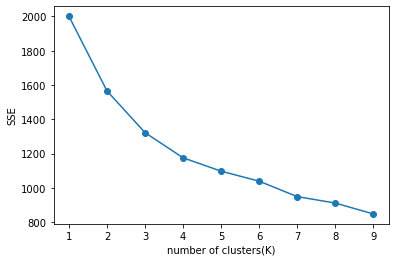

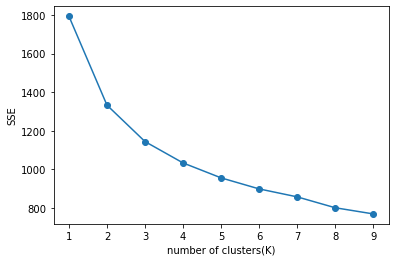

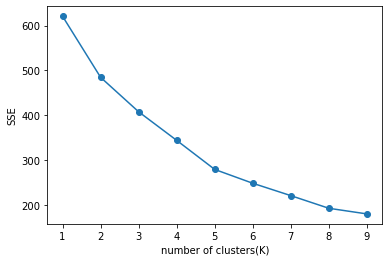

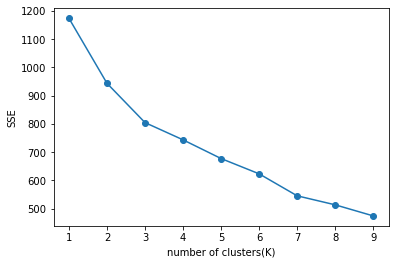

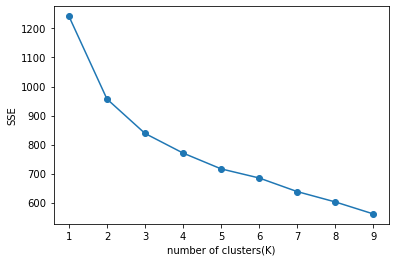

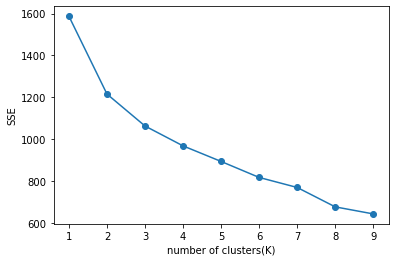

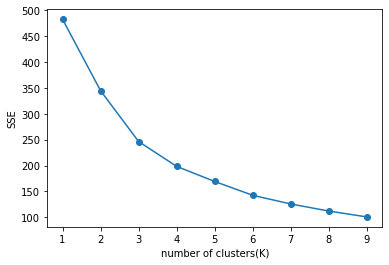

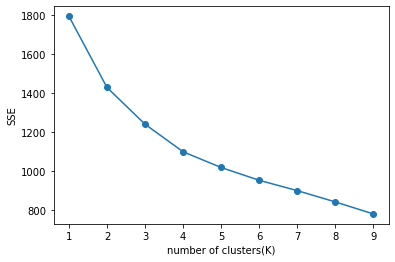

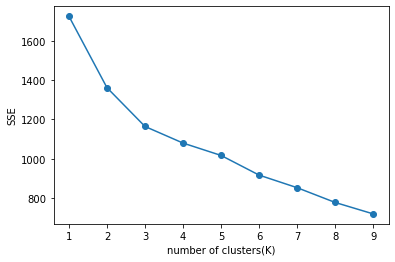

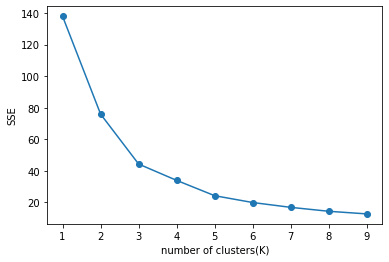

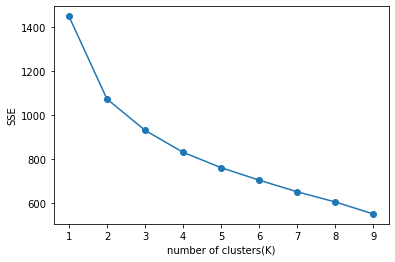

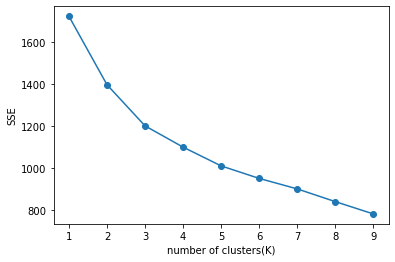

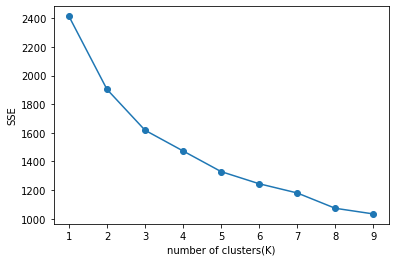

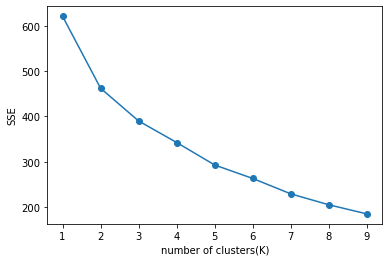

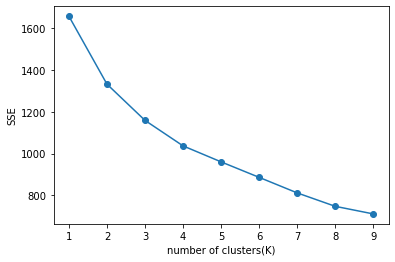

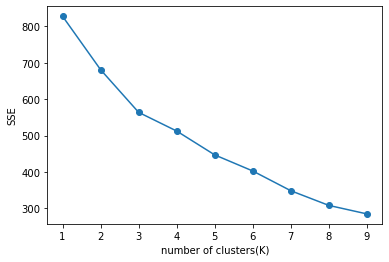

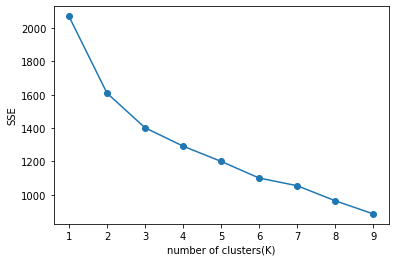

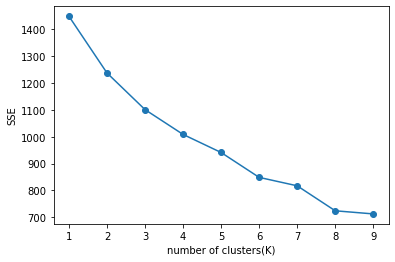

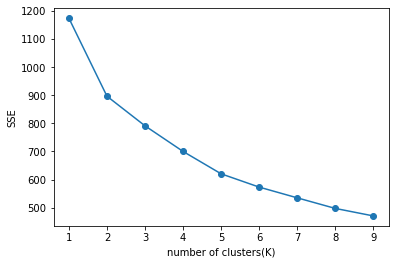

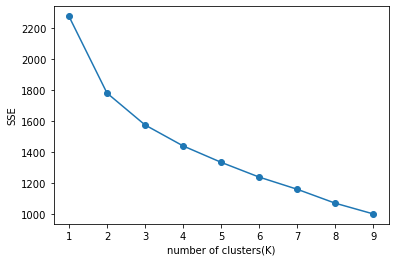

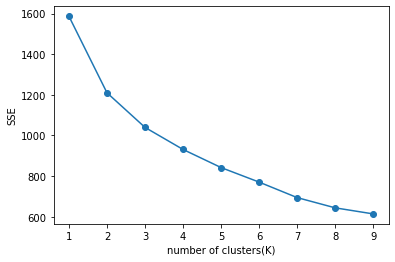

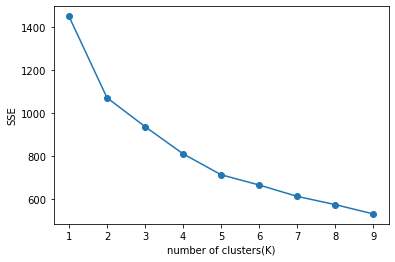

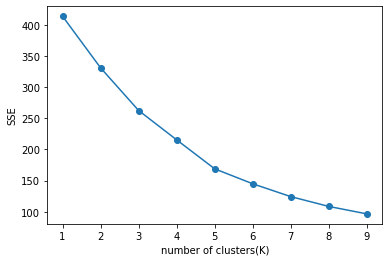

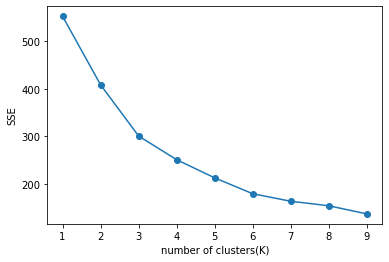

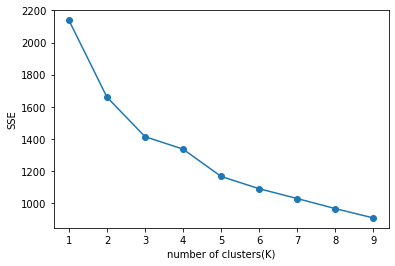

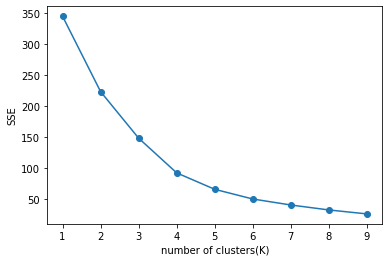

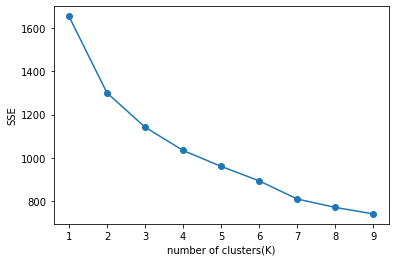

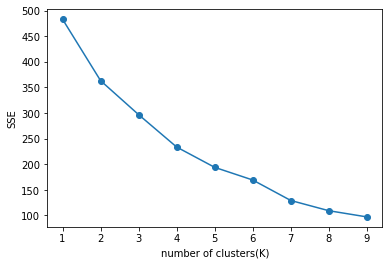

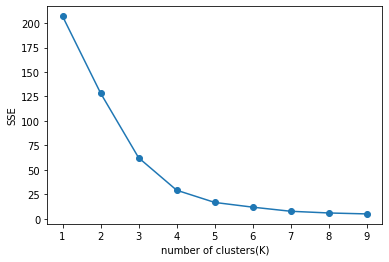

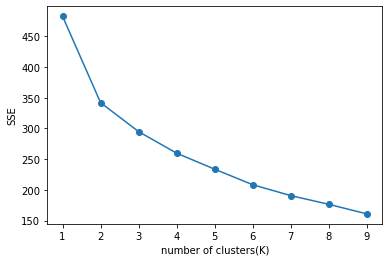

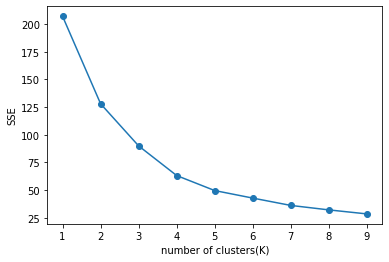

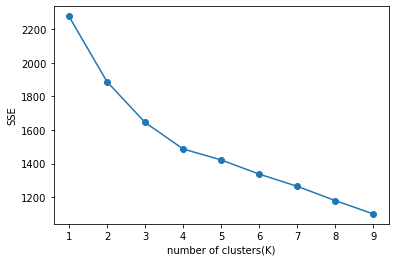

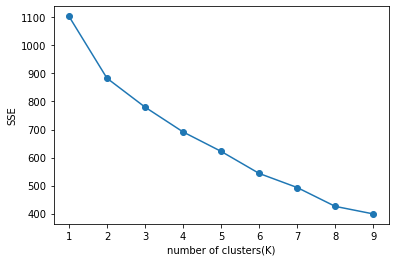

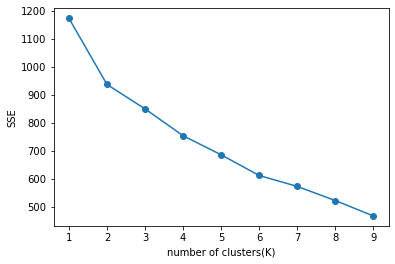

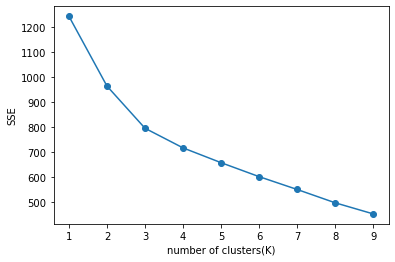

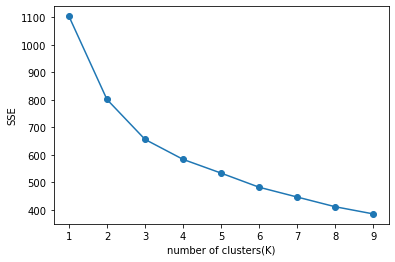

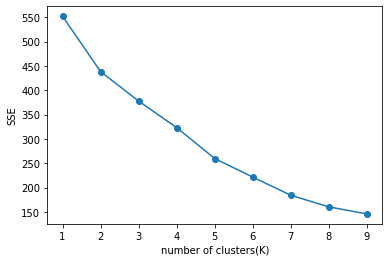

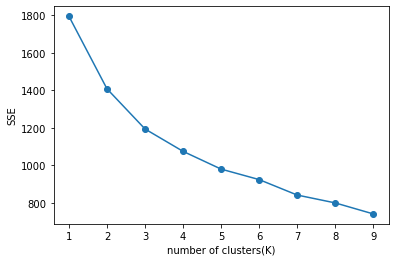

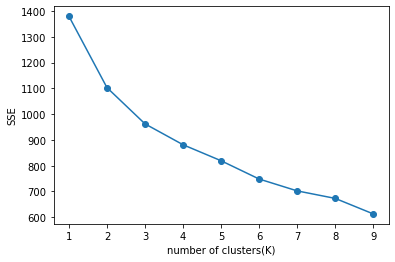

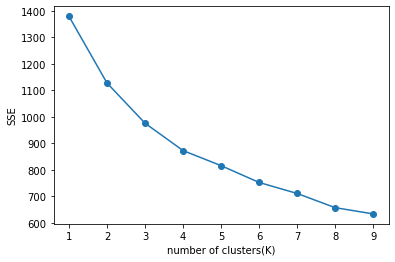

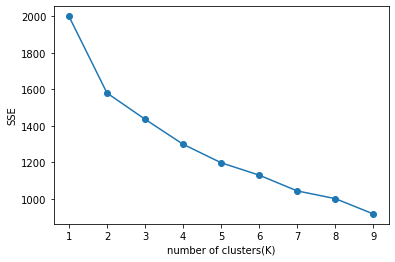

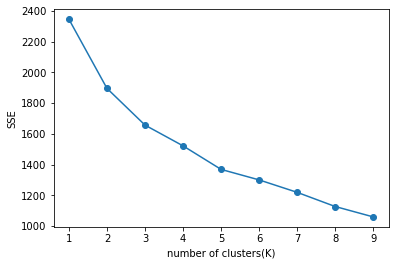

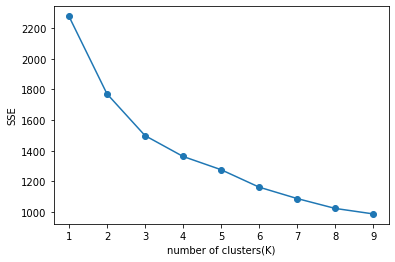

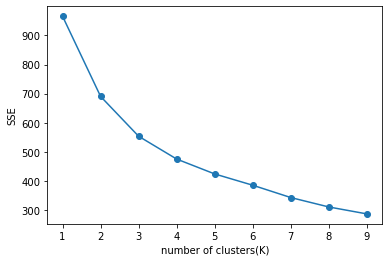

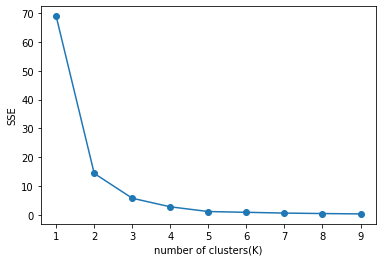

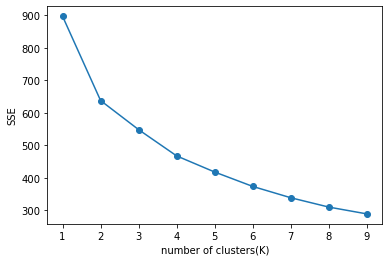

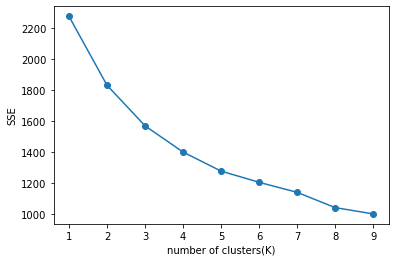

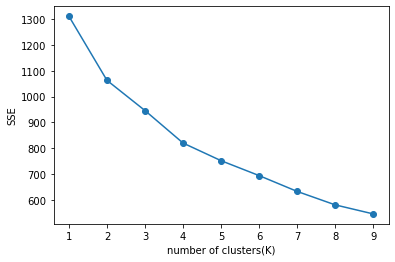

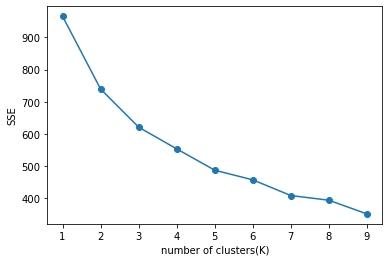

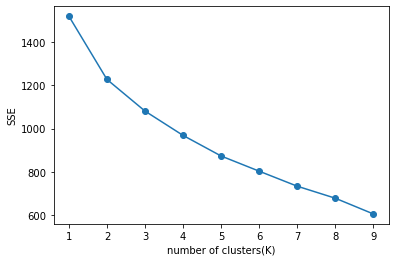

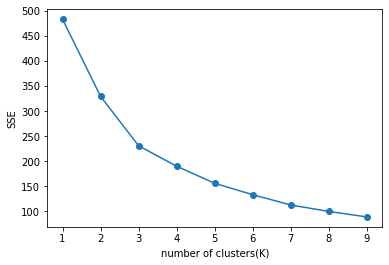

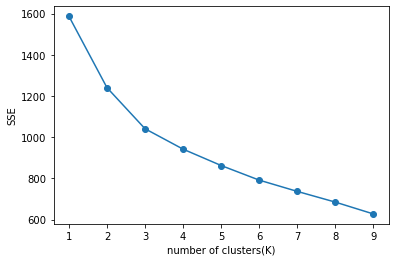

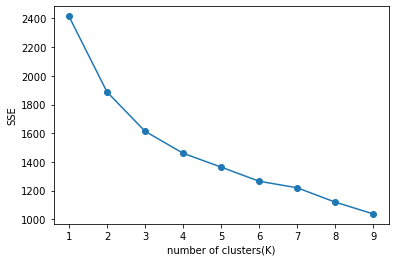

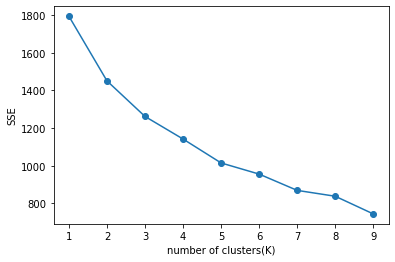

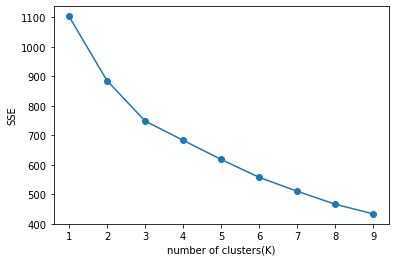

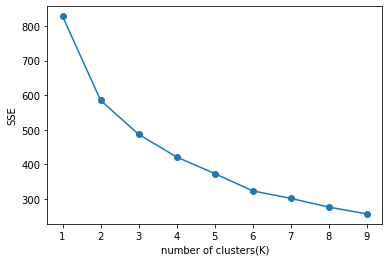

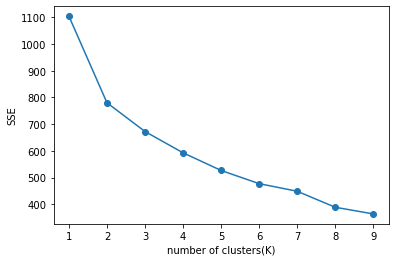

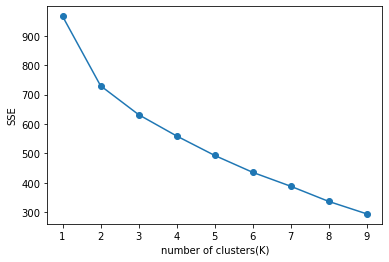

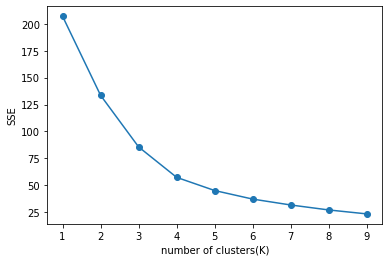

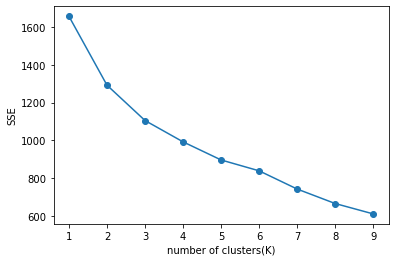

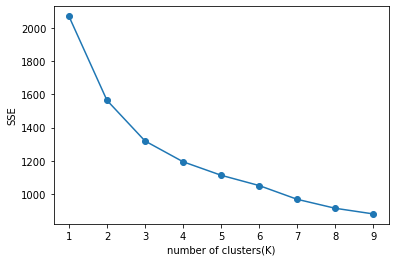

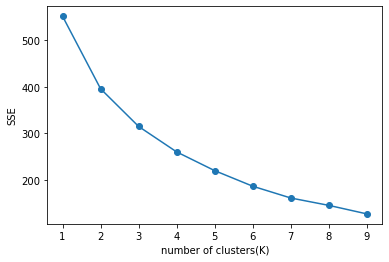

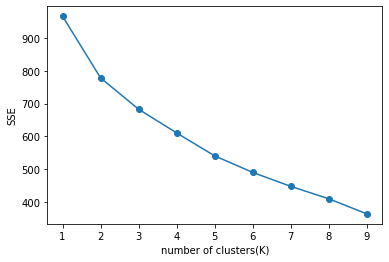

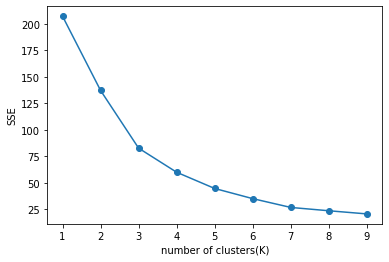

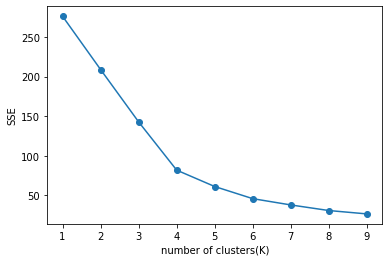

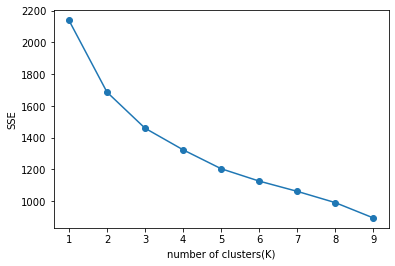

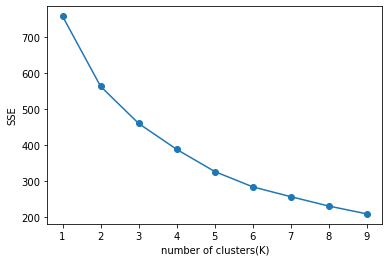

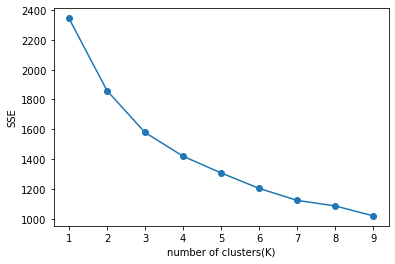

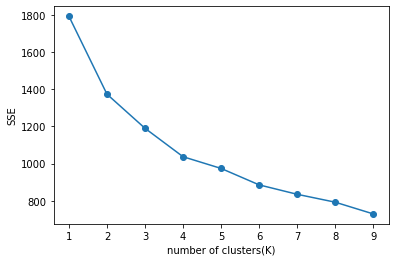

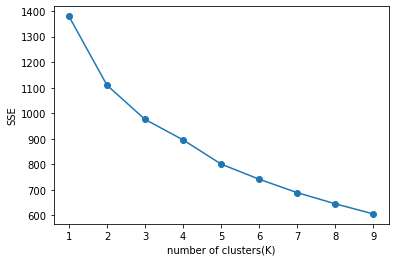

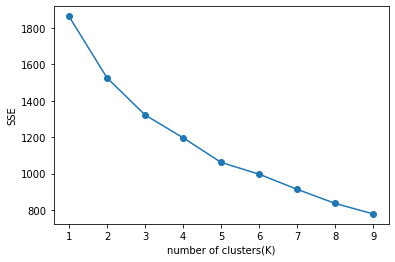

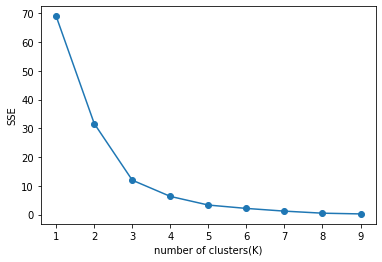

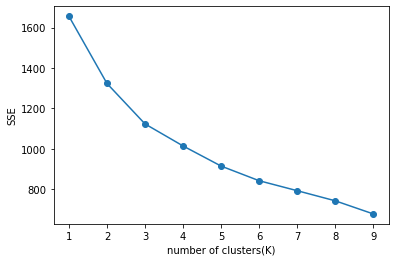

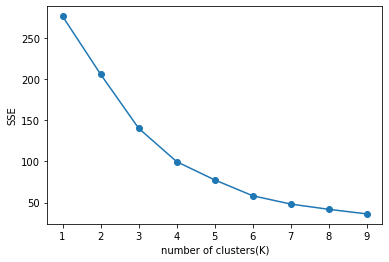

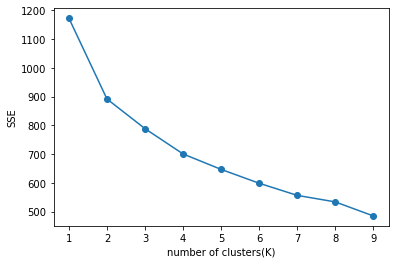

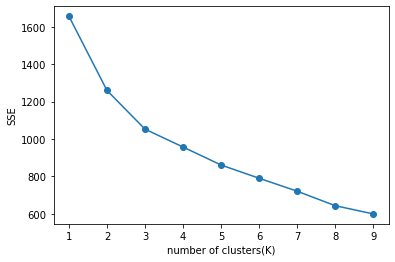

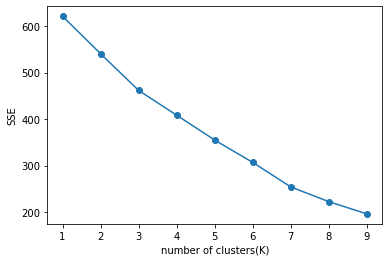

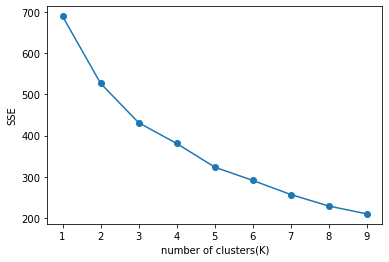

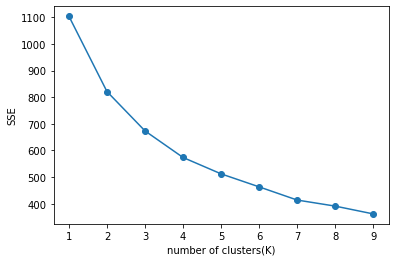

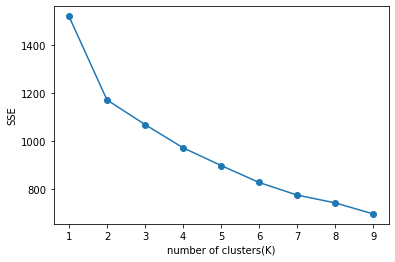

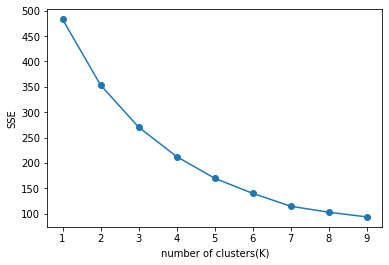

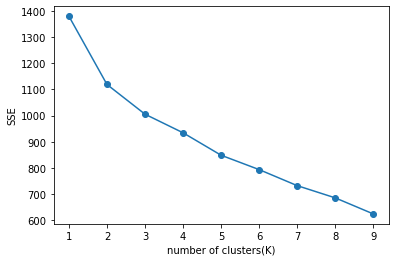

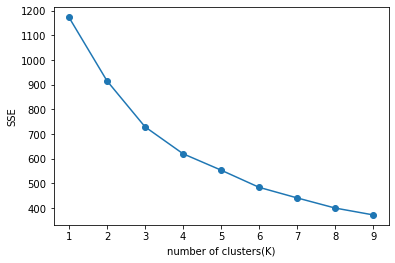

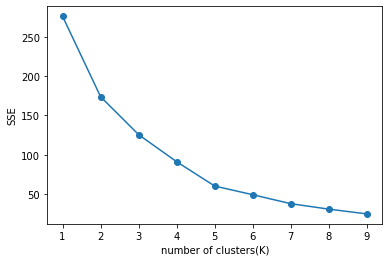

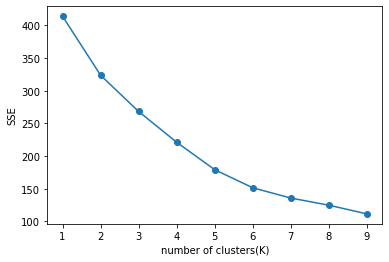

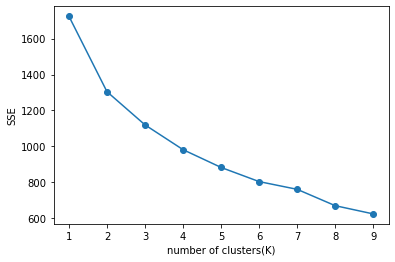

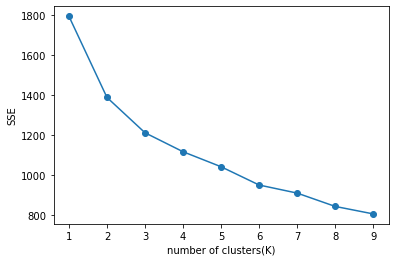

In [ ]:
# 예쁘게 모으는 거에 성공하면, 성공적인 칼럼들이 무엇인지 저장 할 칼럼
features = []
temp_list = []


# 마지막에 정리 할 때 쓸거야
얼마나_나왔니 = pd.DataFrame(columns=군집.columns)
x = 1

ks = range(1,10)
inertias = []

for i in range(0,반복):
    # 총 53개의 컬럼 중에 몇개나 뽑을지 무작위로 정함(randrange) = 몇개 뽑을지 picks에 저장
    picks = random.randrange(1,53)
    
    # picks에 5개가 나오면 5개, 10개가 나오면 10개, 기존의 데이터 칼럼 리스트에서 뽑는다.
    sampling = random.choices(target, k = picks)
    sampling = set(sampling)
    sampling = list(sampling)
    
    # 예를들어 인구밀도, 성비를 컬럼에서 뽑았다면 이에 해당하는 컬럼들만 모아서 데이터 프레임을 만든다.
    target_data = 군집[sampling]
    data_standadized = StandardScaler().fit_transform(target_data)
    
    for k in ks:
        model = KMeans(n_clusters=k)
        model.fit(data_standadized)
        inertias.append(model.inertia_)

    plt.plot(ks, inertias, '-o')
    plt.xlabel('number of clusters(K)')
    plt.ylabel('SSE')
    plt.xticks(ks)
    plt.show()
    inertias = []